<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

## Exploratory Data Analysis - IMDB 1000 Movies Dataset
## By:- Mohammed Abrar Khalandar

# Table of Contents

1. [Problem Statement](#section1)
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section31)<br/>
    - 3.2 [Pre Profiling](#section32)<br/>
    - 3.3 [Preprocessing](#section33)<br/>
    - 3.4 [Post Profiling](#section34)<br/>
4. [Questions](#section4)
    - 4.1 [Deriving Top Genres,Actors and Directors based on their Movies Revenue, Ratings and Metascores:](#section41)
        - 4.1.1 [Years in which the Movies Revenues had a rise?](#section411)
        - 4.1.2 [Years in which the Movies Ratings had a rise?](#section412)
        - 4.1.3 [Years In which the Movies Metascores had a rise?](#section413)
    - 4.2 [Deriving best Genre from the Dataset:](#section42)
        - 4.2.1 [Which are the top most Genres in years where the Movies Revenue had a rise?](#section421)
        - 4.2.2 [Which are the top most Genres in years where the Movies Ratings had a rise?](#section422)
        - 4.2.3 [Which are the top most Genres in years where the Movies Metascores had a rise?](#section423)
        - 4.2.4 [Which are the top 10 Genres based on Revenue, Ratings and Metascores?](#section424)
    - 4.3 [Deriving best Actors from the Dataset:](#section43)
        - 4.3.1 [Which are the top most Actors in years where the Movies Revenue had a rise?](#section431)
        - 4.3.2 [Which are the top most Actors in years where the Movies Ratings had a rise?](#section432)
        - 4.3.3 [Which are the top most Actors in years where the Movies Metascores had a rise?](#section433)
        - 4.3.4 [Which are the top 10 Actors based on Revenue, Ratings and Metascores?](#section434)
    - 4.4 [Deriving best Director from the Dataset:](#section44)
        - 4.4.1 [Which are the top most Directors in years where the Movies Revenue had a rise?](#section441)
        - 4.4.2 [Which are the top most Directors in years where the Movies Ratings had a rise?](#section442)
        - 4.4.3 [Which are the top most Directors in years where the Movies Metascores had a rise?](#section443)
        - 4.4.4 [Which are the top 10 Directors based on Revenue, Ratings and Metascores?](#section444)
5. [Conclusions](#section5)<br/> 

<a id='section1'></a>
## 1. Problem Statement

>A production company is planning to produce a movie, which the audience would like, generating them a good revenue.
>In-order to make the right decision, the production company needs to decide the best Director, Genre of the Movie and Actors to make it a success with Good user and Critics rating.

>They have approaced a Data Scientist with IMDB database of 1000 movies for the last 10 years (2006-2016) to help them make a right decision.


<a id='section2'></a>
## 2. Data Loading and Description

>IMDb (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.

>The Dataset is derived from IMDb  which consists of 1000 movies from year 2006 to 2016.
>The Dataset consists of information such as Movie Title, Genre, Director, Actors, Ratings, Revenue etc.

>The Dataset Comprises of 1000 rows and 12 columns. Below is a table where each of the columns are explained in detail.


|Columns            |Description     |
|-------------------|-----------------|
|Rank               |Ranking of Movies|
|Title              |Title of the film|
|Genre              |List of genres to classify the Movies|
|Description        |Brief summary of the Movies|
|Director           |Movies Directors|
|Actors             |Main Actors of the Movies|
|Year               |Release year of the Movies|
|Runtime (Minutes)  |Duration of the film in minutes|
|Rating|User ratings for the movie 0-10|
|Votes              |Number of votes|
|Revenue (Millions) |Movies revenue in millions|
|Metascore          |Average of critic scores from 0-100|

#### Import the required packages for EDA

In [280]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

#### Importing IMDb Movies dataset

In [281]:
Movies = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")  

<a id='section3'></a>
## 3. Data Profiling

- First lets __understand our dataset__ using various pandas functionalities.
- Later with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Post preprocessing lets do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id='section31'></a>
### 3.1 Understanding the Dataset

In [282]:
# Identify number of rows and columns
Movies.shape

(1000, 12)

In [283]:
#Identify the columns in the Dataset
Movies.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [284]:
#Identify top 5 rows of the Datset
Movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [285]:
#Identify last 5 rows of the Datset
Movies.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [286]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [287]:
Movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [288]:
Movies.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

#### From above cell we can see that Revenue and Metascore columns has values missing

<a id='section32'></a>
### 3.2 Pre Profiling

In [289]:
Movies_profile = pandas_profiling.ProfileReport(Movies)
Movies_profile.to_file(outputfile="IMDb_Movies_before_preprocessing.html")

#### Once Profiling is completed,we shall have a look at the file IMDb_Movies_before_preprocessing to understand our data better and how to deal with missing data.


<a id='section33'></a>
### 3.3 Pre Processing

We are taking care of missing data as below:
   1. __Metascore__ has __6.4%__ missing values and hence we fill up the missing data with _Mean_ values grouped by year
   2. __Revenue (Millions)__ has __12.8%__ missing values and hece we fill up the missing data with _Mean_ values grouped by year

In [290]:
#Set Index to Title
Movies.set_index('Title')

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


Replace Missing Values of __Metascore__ with Mean

In [291]:
s = Movies.groupby('Year')['Metascore'].transform('mean')
Movies['Metascore'].fillna(s, inplace=True)

Confirm if there are any Missing values in __Metascore__ Column

In [292]:
Movies['Metascore'].isnull().any()

False

Replace Missing Values of __Revenue (Millions)__ with Mean

In [293]:
t = Movies.groupby('Year')['Revenue (Millions)'].transform('mean')
Movies['Revenue (Millions)'].fillna(t, inplace=True)

Confirm if there are any Missing values in __Revenue (Millions)__ Column

In [294]:
Movies['Revenue (Millions)'].isnull().any()

False

In [295]:
Movies.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [296]:
Movies.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

<a id='section34'></a>
### 3.4 Post Profiling

In [297]:
Movies_profile = pandas_profiling.ProfileReport(Movies)
Movies_profile.to_file(outputfile="IMDb_Movies_after_preprocessing.html")

Once the post profiling is completedand missing data from columns are eliminated, Our data remains with __0%__ missing data and __13__ Variable.

<a id='section4'></a>
## 4. Questions

<a id='section41'></a>
### 4.1 Deriving Top Genres,Actors and Directors based on their Movies Revenue, Ratings and Metascores:

<a id='section411'></a>
#### 4.1.1 Years in which the Movies Revenues had a rise?

In [298]:
# Taking average of Revenue by years

Movies_Revenue_Years = Movies.groupby('Year').agg({'Revenue (Millions)':'mean'})
Movies_Revenue_Years = Movies_Revenue_Years.rename(columns={'Revenue (Millions)': 'Revenue'})
Movies_Revenue_Years

,Revenue
Year,
2006,86.296667
2007,87.882245
2008,99.082745
2009,112.601277
2010,105.081579
2011,87.612258
2012,107.973281
2013,87.121818
2014,85.078723


Text(0, 0.5, 'Revenue over years average')

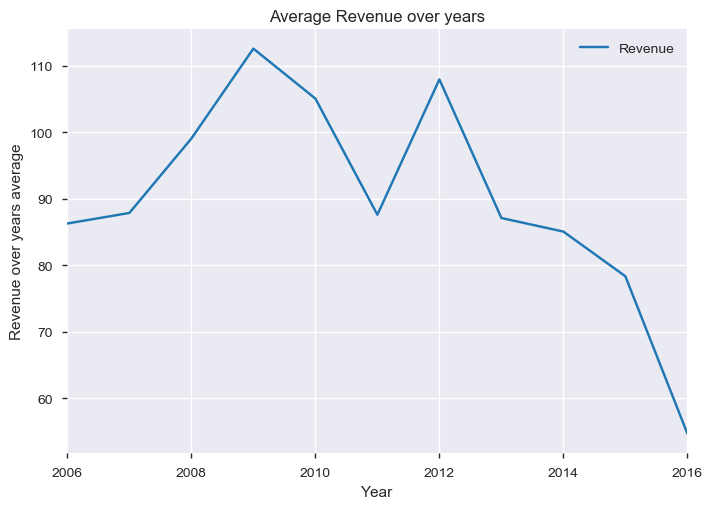

In [299]:
# PLotting Average Revenue over years

ax = Movies_Revenue_Years.plot.line();
ax.set_title('Average Revenue over years')
ax.set_ylabel('Revenue over years average')

> ##### Years 2009 and 2012 has the best Revenue generated in the years 2006 - 2016

<a id='section412'></a>
#### 4.1.2  Years in which the Movies Ratings had a rise?

In [300]:
#Taking avearage Rating by years

Movies_Rating_Years = Movies.groupby('Year').agg({'Rating':'mean'})
Movies_Rating_Years

,Rating
Year,
2006,7.125000
2007,7.133962
2008,6.784615
2009,6.960784
2010,6.826667
2011,6.838095
2012,6.925000
2013,6.812088
2014,6.837755


Text(0, 0.5, 'Rating over years average')

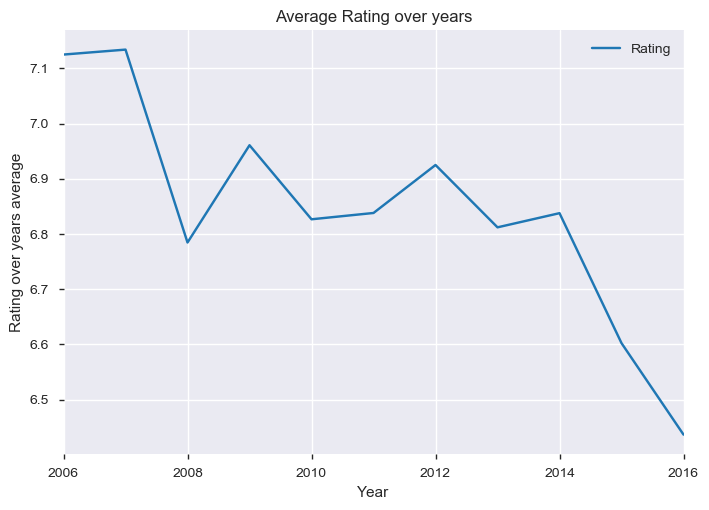

In [301]:
#Plotting average rating by years

ax = Movies_Rating_Years.plot.line();
ax.set_title('Average Rating over years')
ax.set_ylabel('Rating over years average')

> ##### Years 2007, 2009 and 2012 had the best Average ratings for Movies in the years 2006 - 2016

<a id='section413'></a>
#### 4.1.3  Years In which the Movies Metascores had a rise?

In [302]:
#Taking average Metascore by years
Movies_Metascore_Years = Movies.groupby('Year').agg({'Metascore':'mean'})
Movies_Metascore_Years

,Metascore
Year,
2006,64.414634
2007,64.500000
2008,57.408163
2009,57.122449
2010,59.389831
2011,61.724138
2012,61.145161
2013,58.534884
2014,57.315789


Text(0, 0.5, 'Metascore over years average')

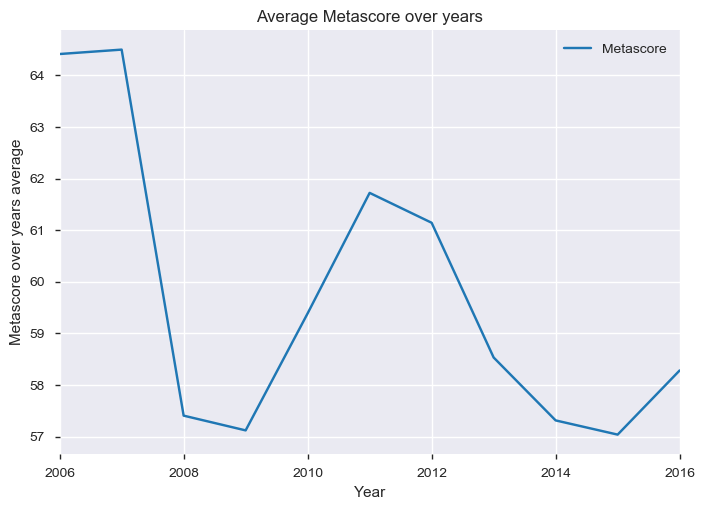

In [303]:
#Plotting average metascore by years

ax = Movies_Metascore_Years.plot.line();
ax.set_title('Average Metascore over years')
ax.set_ylabel('Metascore over years average')

> ##### Year 2007 and 2011 had the best average Metascore in years 2006 - 2016

<a id='section42'></a>
### 4.2 Deriving Genre

<a id='section421'></a>
#### 4.2.1  Which are the top most Genres in years where the Movies Revenue had a rise?

In [304]:
#Top revenue movies in 2009 by Genre

Genre_Revenue_2009 = Movies['Year']==2009

Movies_Genre_2009_Revenue = Movies[Genre_Revenue_2009]
Movies_Genre_2009_Revenue

Final_Genre_Revenue_2009 = Movies_Genre_2009_Revenue.groupby('Genre').agg({'Revenue (Millions)':'mean'}).sort_values('Revenue (Millions)', ascending=False)[:5]
Final_Genre_Revenue_2009

,Revenue (Millions)
Genre,
"Adventure,Family,Fantasy",301.960000
"Action,Adventure,Fantasy",271.886667
"Biography,Drama,Sport",255.950000
"Action,Adventure,Sci-Fi",231.188000
"Action,Adventure,Crime",209.020000


In [305]:
#Top revenue movies in 2012 by Genre

Genre_Revenue_2012 = Movies['Year']==2012

Movies_Genre_2012_Revenue = Movies[Genre_Revenue_2012]
Movies_Genre_2012_Revenue

Final_Genre_Revenue_2012 = Movies_Genre_2012_Revenue.groupby('Genre').agg({'Revenue (Millions)':'mean'}).sort_values('Revenue (Millions)', ascending=False)[:5]
Final_Genre_Revenue_2012

,Revenue (Millions)
Genre,
"Adventure,Sci-Fi,Thriller",408.000
"Action,Sci-Fi",318.340
"Adventure,Fantasy",303.000
"Action,Adventure",262.030
"Action,Thriller",246.465


In [306]:
# Final Genre Based on Revenue

Highest_Revenue_Genre_concat = pd.concat([Final_Genre_Revenue_2009, Final_Genre_Revenue_2012]).sort_values('Revenue (Millions)', ascending=False)
Highest_Revenue_Genre_concat

,Revenue (Millions)
Genre,
"Adventure,Sci-Fi,Thriller",408.000000
"Action,Sci-Fi",318.340000
"Adventure,Fantasy",303.000000
"Adventure,Family,Fantasy",301.960000
"Action,Adventure,Fantasy",271.886667
"Action,Adventure",262.030000
"Biography,Drama,Sport",255.950000
"Action,Thriller",246.465000
"Action,Adventure,Sci-Fi",231.188000


Text(0, 0.5, 'Revenue (Millions)')

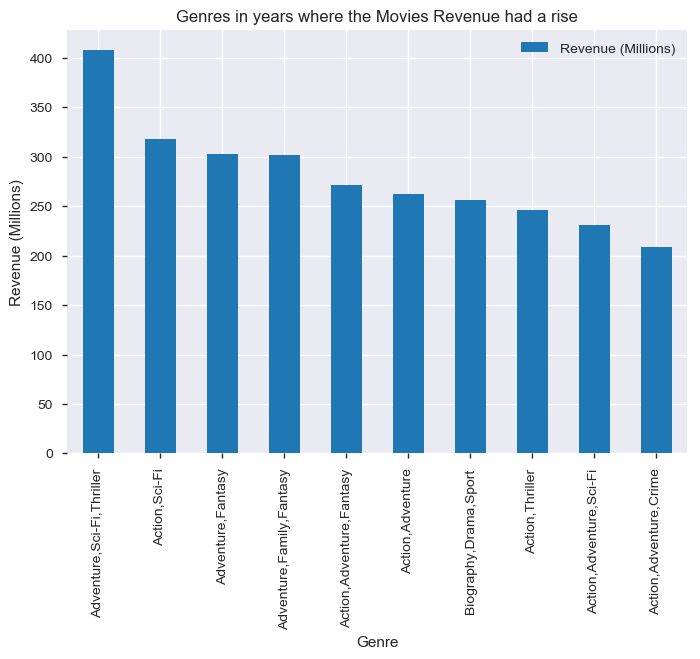

In [307]:
#Plotting Highest Revenue by Genre over the years 2006-2016

ax = Highest_Revenue_Genre_concat.plot.bar();
ax.set_title('Genres in years where the Movies Revenue had a rise')
ax.set_ylabel('Revenue (Millions)')

> ##### As years 2009 and 2012 had the hightest revenue, Movies with Genre combination Adventure, SciFi, Thriller tops the chart based on Revenue (Millions)

<a id='section422'></a>
#### 4.2.2 Which are the top most Genres in years where the Movies Ratings had a rise?

In [308]:
#Top Rating movies in 2007 by Genre

Genre_Rating_2007 = Movies['Year']==2007

Movies_Genre_2007_Rating = Movies[Genre_Rating_2007]
Movies_Genre_2007_Rating

Final_Genre_Rating_2007 = Movies_Genre_2007_Rating.groupby('Genre').agg({'Rating':'mean'}).sort_values('Rating', ascending=False)[:5]
Final_Genre_Rating_2007

,Rating
Genre,
"Drama,Family,Music",8.5
"Drama,History",8.1
"Action,Mystery,Thriller",8.1
"Adventure,Biography,Drama",8.1
"Action,Comedy,Mystery",7.9


In [309]:
#Top Rating movies in 2009 by Genre

Genre_Rating_2009 = Movies['Year']==2009

Movies_Genre_2009_Rating = Movies[Genre_Rating_2009]
Movies_Genre_2009_Rating

Final_Genre_Rating_2009 = Movies_Genre_2009_Rating.groupby('Genre').agg({'Rating':'mean'}).sort_values('Rating', ascending=False)[:5]
Final_Genre_Rating_2009

,Rating
Genre,
"Comedy,Drama",8.4
"Adventure,Drama,War",8.3
"Drama,Mystery,Romance",8.2
"Drama,Family",8.1
"Action,Sci-Fi,Thriller",8.0


In [310]:
#Top Rating movies in 2012 by Genre

Genre_Rating_2012 = Movies['Year']==2012

Movies_Genre_2012_Rating = Movies[Genre_Rating_2012]
Movies_Genre_2012_Rating

Final_Genre_Rating_2012 = Movies_Genre_2012_Rating.groupby('Genre').agg({'Rating':'mean'}).sort_values('Rating', ascending=False)[:5]
Final_Genre_Rating_2012

,Rating
Genre,
"Drama,Western",8.4
"Adventure,Fantasy",7.9
"Adventure,Comedy,Drama",7.8
"Drama,Musical,Romance",7.6
"Action,Sci-Fi",7.6


In [311]:
# Final Genre Based on Rating

Highest_Rating_Genre_concat = pd.concat([Final_Genre_Rating_2007, Final_Genre_Rating_2009,Final_Genre_Rating_2012]).sort_values('Rating', ascending=False)
Highest_Rating_Genre_concat

,Rating
Genre,
"Drama,Family,Music",8.5
"Comedy,Drama",8.4
"Drama,Western",8.4
"Adventure,Drama,War",8.3
"Drama,Mystery,Romance",8.2
"Drama,History",8.1
"Action,Mystery,Thriller",8.1
"Adventure,Biography,Drama",8.1
"Drama,Family",8.1


Text(0, 0.5, 'Rating')

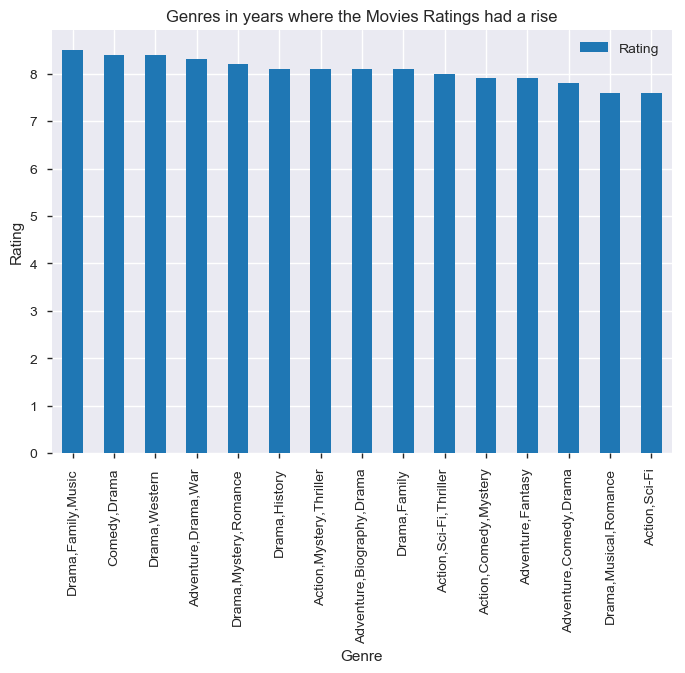

In [312]:
#Plotting Highest Rating by Genre over the years 2006-2016

ax = Highest_Rating_Genre_concat.plot.bar();
ax.set_title('Genres in years where the Movies Ratings had a rise')
ax.set_ylabel('Rating')

> ##### As years 2007, 2009 and 2012 had the highest Rating, Movies with Drama,Family, Music tops the chart based on ratings

<a id='section423'></a>
#### 4.2.3  Which are the top most Genres in years where the Movies Metascores had a rise?

In [313]:
#Top Metascore movies in 2007 by Genre

Genre_Metascore_2007 = Movies['Year']==2007

Movies_Genre_2007_Metascore = Movies[Genre_Metascore_2007]
Movies_Genre_2007_Metascore

Final_Genre_Metascore_2007 = Movies_Genre_2007_Rating.groupby('Genre').agg({'Metascore':'mean'}).sort_values('Metascore', ascending=False)[:5]
Final_Genre_Metascore_2007

,Metascore
Genre,
"Drama,History",92.0
"Animation,Comedy,Family",85.5
"Action,Mystery,Thriller",85.0
"Drama,Horror,Musical",83.0
"Action,Comedy,Mystery",81.0


In [314]:
#Top Metascore movies in 2011 by Genre

Genre_Metascore_2011 = Movies['Year']==2011

Movies_Genre_2011_Metascore = Movies[Genre_Metascore_2011]
Movies_Genre_2011_Metascore

Final_Genre_Metascore_2011 = Movies_Genre_2011_Metascore.groupby('Genre').agg({'Metascore':'mean'}).sort_values('Metascore', ascending=False)[:5]
Final_Genre_Metascore_2011

,Metascore
Genre,
"Drama,Horror,Thriller",94.0
"Biography,Drama,Sport",87.0
"Drama,Fantasy",85.0
"Comedy,Drama",84.0
"Adventure,Drama,Family",83.0


In [315]:
# Final Genre Based on Metascore

Highest_Metascore_Genre_concat = pd.concat([Final_Genre_Metascore_2007, Final_Genre_Metascore_2011]).sort_values('Metascore', ascending=False)
Highest_Metascore_Genre_concat

,Metascore
Genre,
"Drama,Horror,Thriller",94.0
"Drama,History",92.0
"Biography,Drama,Sport",87.0
"Animation,Comedy,Family",85.5
"Action,Mystery,Thriller",85.0
"Drama,Fantasy",85.0
"Comedy,Drama",84.0
"Drama,Horror,Musical",83.0
"Adventure,Drama,Family",83.0


Text(0, 0.5, 'Metascore')

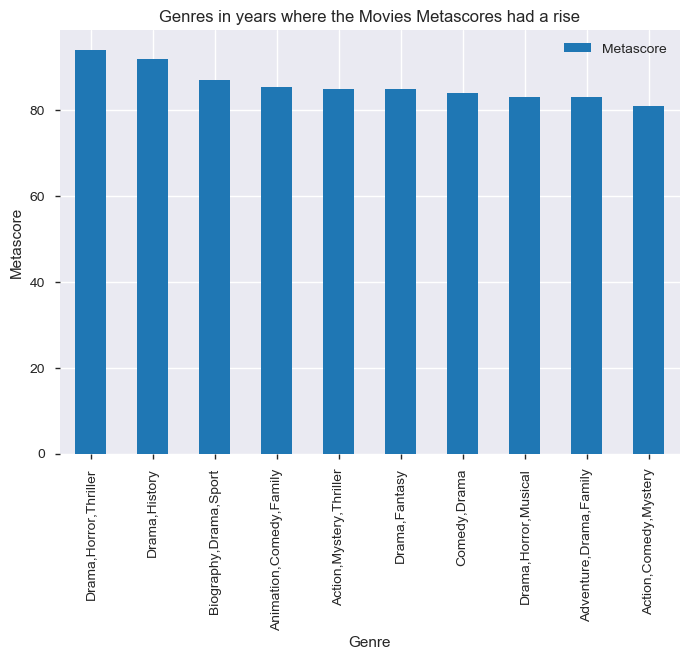

In [316]:
#Plotting Highest Metascore by Genre over the years 2006-2016

ax = Highest_Metascore_Genre_concat.plot.bar();
ax.set_title('Genres in years where the Movies Metascores had a rise')
ax.set_ylabel('Metascore')

> ##### As years 2007 and 2011 had the highest Metascore, Movies with Genre Combination Drama, Horror and Thriller tops the chart based on Metascore

<a id='section424'></a>
#### 4.2.4 Which are the top 10 Genres based on Revenue, Ratings and Metascores?

In [317]:
#Final List of Genre based on Revenue, Rating and Metascore

Final_Genre_DF = pd.concat([Highest_Revenue_Genre_concat,Highest_Rating_Genre_concat, Highest_Metascore_Genre_concat]).sort_values('Genre', ascending=False)
Final_Genre_DF = Final_Genre_DF.reset_index().set_index('Rating')
Final_Genre_DF

C:\Users\abrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Genre,Metascore,Revenue (Millions)
Rating,,,
8.4,"Drama,Western",NaN,NaN
8.2,"Drama,Mystery,Romance",NaN,NaN
7.6,"Drama,Musical,Romance",NaN,NaN
NaN,"Drama,Horror,Thriller",94.0,NaN
NaN,"Drama,Horror,Musical",83.0,NaN
8.1,"Drama,History",NaN,NaN
NaN,"Drama,History",92.0,NaN
NaN,"Drama,Fantasy",85.0,NaN
8.5,"Drama,Family,Music",NaN,NaN


In [318]:
#Split Genre combination to different columns

Split_Genre = Final_Genre_DF['Genre'].str.split(',', expand=True).rename(columns = lambda x: "Split_Genre"+str(x+1))
Split_Genre

,Split_Genre1,Split_Genre2,Split_Genre3
Rating,,,
8.4,Drama,Western,None
8.2,Drama,Mystery,Romance
7.6,Drama,Musical,Romance
NaN,Drama,Horror,Thriller
NaN,Drama,Horror,Musical
8.1,Drama,History,None
NaN,Drama,History,None
NaN,Drama,Fantasy,None
8.5,Drama,Family,Music


In [320]:
#appending Split_Genre1 and Split_Genre2

Two_columns = Split_Genre['Split_Genre1'].append(Split_Genre['Split_Genre2'])
Two_columns_df = pd.DataFrame({'Two_columns_df2':Two_columns})
Two_columns_df

,Two_columns_df2
Rating,
8.4,Drama
8.2,Drama
7.6,Drama
NaN,Drama
NaN,Drama
8.1,Drama
NaN,Drama
NaN,Drama
8.5,Drama


In [322]:
#appending Two_columns_df with Split_Genre3
Third_column = Split_Genre['Split_Genre3'].append(Two_columns_df['Two_columns_df2'])
Three_columns_combined = pd.DataFrame({'Genre_Combined':Third_column})
Three_columns_combined

,Genre_Combined
Rating,
8.4,None
8.2,Romance
7.6,Romance
NaN,Thriller
NaN,Musical
8.1,None
NaN,None
NaN,None
8.5,Music


In [324]:
#Top 10 Genre based on unique value counts of Genre

Top_Genre = Three_columns_combined['Genre_Combined'].value_counts()
Top_10_Genre = Top_Genre.head(10)
Top_Genre_df = pd.DataFrame(Top_10_Genre)
Top_Genre_df

,Genre_Combined
Drama,18
Adventure,12
Action,12
Comedy,6
Thriller,6
Mystery,5
Sci-Fi,5
Family,5
Fantasy,5
Biography,3


Text(0.5, 1.0, 'Top 10 Genre from 2006 to 2016')

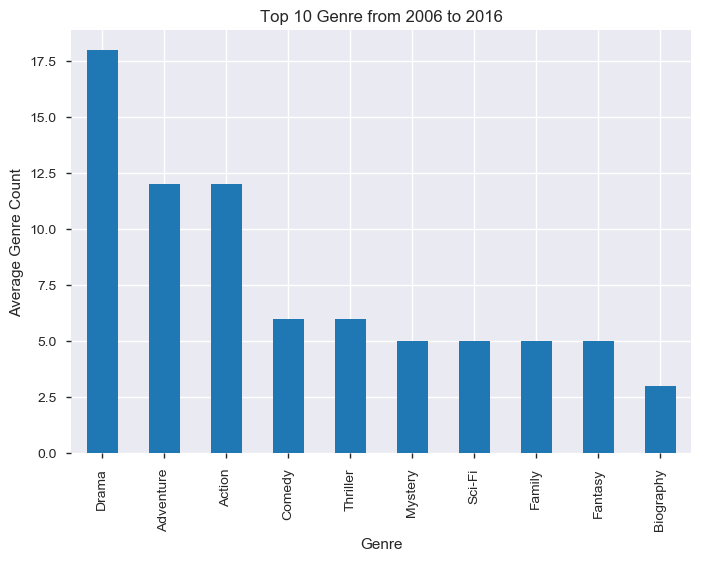

In [325]:
#Top 10 Genre from 2006 to 2016
ax = Top_Genre_df['Genre_Combined'].plot.bar();
ax.set_ylabel('Average Genre Count')
ax.set_xlabel('Genre')
ax.set_title('Top 10 Genre from 2006 to 2016')

> ##### From the above plot we see that Movie Genre with Drama is the best followed by Adventure and Action based on Revenue, Rating and Metascore

<a id='section43'></a>
### 4.3 Deriving best Actors from the Dataset:

<a id='section431'></a>
#### 4.3.1  Which are the top most Actors in years where the Movies Revenue had a rise?

In [326]:
#Top revenue movies in 2009 by Actors

Actors_Revenue_2009 = Movies['Year']==2009

Movies_Actors_2009_Revenue = Movies[Actors_Revenue_2009]
Movies_Actors_2009_Revenue

Final_Actors_Revenue_2009 = Movies_Actors_2009_Revenue.groupby('Actors').agg({'Revenue (Millions)':'mean'}).sort_values('Revenue (Millions)', ascending=False)[:5]
Final_Actors_Revenue_2009

,Revenue (Millions)
Actors,
"Sam Worthington, Zoe Saldana, Sigourney Weaver, Michelle Rodriguez",760.51
"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson",402.08
"Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon",301.96
"Edward Asner, Jordan Nagai, John Ratzenberger, Christopher Plummer",292.98
"Zach Galifianakis, Bradley Cooper, Justin Bartha, Ed Helms",277.31


In [327]:
#Top revenue movies in 2012 by Actors

Actors_Revenue_2012 = Movies['Year']==2012

Movies_Actors_2012_Revenue = Movies[Actors_Revenue_2012]
Movies_Actors_2012_Revenue

Final_Actors_Revenue_2012 = Movies_Actors_2012_Revenue.groupby('Actors').agg({'Revenue (Millions)':'mean'}).sort_values('Revenue (Millions)', ascending=False)[:5]
Final_Actors_Revenue_2012

,Revenue (Millions)
Actors,
"Robert Downey Jr., Chris Evans, Scarlett Johansson,Jeremy Renner",623.28
"Christian Bale, Tom Hardy, Anne Hathaway,Gary Oldman",448.13
"Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth,Stanley Tucci",408.00
"Daniel Craig, Javier Bardem, Naomie Harris, Judi Dench",304.36
"Martin Freeman, Ian McKellen, Richard Armitage,Andy Serkis",303.00


In [328]:
# Final Actors Based on Revenue

Highest_Revenue_Actors_concat = pd.concat([Final_Actors_Revenue_2009, Final_Actors_Revenue_2012]).sort_values('Revenue (Millions)', ascending=False)
Highest_Revenue_Actors_concat

,Revenue (Millions)
Actors,
"Sam Worthington, Zoe Saldana, Sigourney Weaver, Michelle Rodriguez",760.51
"Robert Downey Jr., Chris Evans, Scarlett Johansson,Jeremy Renner",623.28
"Christian Bale, Tom Hardy, Anne Hathaway,Gary Oldman",448.13
"Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth,Stanley Tucci",408.00
"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson",402.08
"Daniel Craig, Javier Bardem, Naomie Harris, Judi Dench",304.36
"Martin Freeman, Ian McKellen, Richard Armitage,Andy Serkis",303.00
"Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon",301.96
"Edward Asner, Jordan Nagai, John Ratzenberger, Christopher Plummer",292.98


Text(0.5, 1.0, 'Actors in years where the Movies Revenue had a rise')

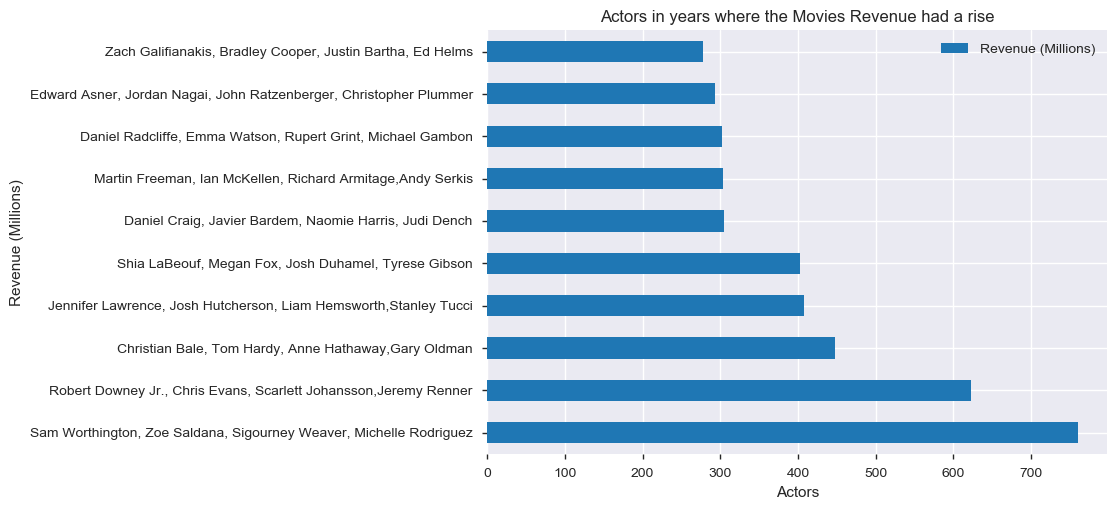

In [329]:
ax = Highest_Revenue_Actors_concat.plot.barh();
ax.set_ylabel('Revenue (Millions)')
ax.set_xlabel('Actors')
ax.set_title('Actors in years where the Movies Revenue had a rise')

> ##### As years 2009 and 2012 had the highest revenue, Movie with combination Sam Worthington, Zoe Saldana, Sigourney Weaver, Michelle Rodriguez tops during  period (2006 - 2016)

<a id='section432'></a>
#### 4.3.2 Which are the top most Actors in years where the Movies Ratings had a rise?

In [330]:
#Top Rating movies in 2007 by Actors

Actors_Rating_2007 = Movies['Year']==2007

Movies_Actors_2007_Rating = Movies[Actors_Rating_2007]
Movies_Actors_2007_Rating

Final_Actors_Rating_2007 = Movies_Actors_2007_Rating.groupby('Actors').agg({'Rating':'mean'}).sort_values('Rating', ascending=False)[:5]
Final_Actors_Rating_2007

,Rating
Actors,
"Darsheel Safary, Aamir Khan, Tanay Chheda, Sachet Engineer",8.5
"Tommy Lee Jones, Javier Bardem, Josh Brolin, Woody Harrelson",8.1
"Daniel Day-Lewis, Paul Dano, Ciarán Hinds,Martin Stringer",8.1
"Emile Hirsch, Vince Vaughn, Catherine Keener, Marcia Gay Harden",8.1
"Matt Damon, Edgar Ramírez, Joan Allen, Julia Stiles",8.1


In [331]:
#Top Rating movies in 2009 by Actors

Actors_Rating_2009 = Movies['Year']==2009

Movies_Actors_2009_Rating = Movies[Actors_Rating_2009]
Movies_Actors_2009_Rating

Final_Actors_Rating_2009 = Movies_Actors_2009_Rating.groupby('Actors').agg({'Rating':'mean'}).sort_values('Rating', ascending=False)[:5]
Final_Actors_Rating_2009

,Rating
Actors,
"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",8.4
"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",8.3
"Edward Asner, Jordan Nagai, John Ratzenberger, Christopher Plummer",8.3
"Ricardo Darín, Soledad Villamil, Pablo Rago,Carla Quevedo",8.2
"Richard Gere, Joan Allen, Cary-Hiroyuki Tagawa,Sarah Roemer",8.1


In [332]:
#Top Rating movies in 2012 by Actors

Actors_Rating_2012 = Movies['Year']==2012

Movies_Actors_2012_Rating = Movies[Actors_Rating_2012]
Movies_Actors_2012_Rating

Final_Actors_Rating_2012 = Movies_Actors_2012_Rating.groupby('Actors').agg({'Rating':'mean'}).sort_values('Rating', ascending=False)[:5]
Final_Actors_Rating_2012

,Rating
Actors,
"Christian Bale, Tom Hardy, Anne Hathaway,Gary Oldman",8.5
"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio,Kerry Washington",8.4
"Mads Mikkelsen, Thomas Bo Larsen, Annika Wedderkopp, Lasse Fogelstrøm",8.3
"Robert Downey Jr., Chris Evans, Scarlett Johansson,Jeremy Renner",8.1
"Logan Lerman, Emma Watson, Ezra Miller, Paul Rudd",8.0


In [333]:
# Final Actors Based on Rating

Highest_Rating_Actors_concat = pd.concat([Final_Actors_Rating_2007, Final_Actors_Rating_2009,Final_Actors_Rating_2012]).sort_values('Rating', ascending=False)
Highest_Rating_Actors_concat

,Rating
Actors,
"Darsheel Safary, Aamir Khan, Tanay Chheda, Sachet Engineer",8.5
"Christian Bale, Tom Hardy, Anne Hathaway,Gary Oldman",8.5
"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",8.4
"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio,Kerry Washington",8.4
"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",8.3
"Edward Asner, Jordan Nagai, John Ratzenberger, Christopher Plummer",8.3
"Mads Mikkelsen, Thomas Bo Larsen, Annika Wedderkopp, Lasse Fogelstrøm",8.3
"Ricardo Darín, Soledad Villamil, Pablo Rago,Carla Quevedo",8.2
"Tommy Lee Jones, Javier Bardem, Josh Brolin, Woody Harrelson",8.1


Text(0.5, 1.0, 'Actors in years where the Movies Ratings had a rise')

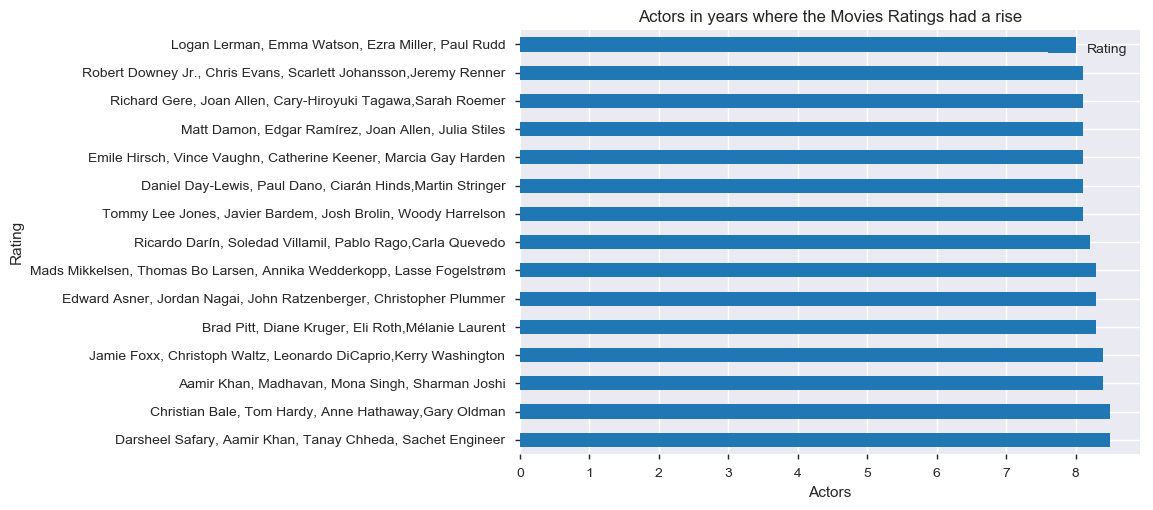

In [334]:
ax = Highest_Rating_Actors_concat.plot.barh();
ax.set_ylabel('Rating')
ax.set_xlabel('Actors')
ax.set_title('Actors in years where the Movies Ratings had a rise')

> ##### As years 2007, 2009 and 2012 had the highest revenue, Actors with combination:
1. Darsheel Safary, Aamir Khan, Tanay Chheda, Sachet Engineer
2. Christian Bale, Tom Hardy, Anne Hathaway,Gary Oldman
tops during the period (2006 - 2016)

<a id='section433'></a>
#### 4.3.3 Which are the top most Actors in years where the Movies Metascores had a rise?

In [335]:
#Top Metascore movies in 2007 by Actors

Actors_Metascore_2007 = Movies['Year']==2007

Movies_Actors_2007_Metascore = Movies[Actors_Metascore_2007]
Movies_Actors_2007_Metascore

Final_Actors_Metascore_2007 = Movies_Actors_2007_Rating.groupby('Actors').agg({'Metascore':'mean'}).sort_values('Metascore', ascending=False)[:5]
Final_Actors_Metascore_2007

,Metascore
Actors,
"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",96.0
"Daniel Day-Lewis, Paul Dano, Ciarán Hinds,Martin Stringer",92.0
"Tommy Lee Jones, Javier Bardem, Josh Brolin, Woody Harrelson",91.0
"Seth Rogen, Katherine Heigl, Paul Rudd, Leslie Mann",85.0
"Matt Damon, Edgar Ramírez, Joan Allen, Julia Stiles",85.0


In [336]:
#Top Metascore movies in 2011 by Actors

Actors_Metascore_2011 = Movies['Year']==2011

Movies_Actors_2011_Metascore = Movies[Actors_Metascore_2011]
Movies_Actors_2011_Metascore

Final_Actors_Metascore_2011 = Movies_Actors_2011_Metascore.groupby('Actors').agg({'Metascore':'mean'}).sort_values('Metascore', ascending=False)[:5]
Final_Actors_Metascore_2011

,Metascore
Actors,
"Amber Perkins, Rachel Quinn, Dean Waite, Jael Elizabeth Steinmeyer",94.0
"Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon",87.0
"Brad Pitt, Robin Wright, Jonah Hill, Philip Seymour Hoffman",87.0
"Brad Pitt, Sean Penn, Jessica Chastain, Hunter McCracken",85.0
"Gary Oldman, Colin Firth, Tom Hardy, Mark Strong",85.0


In [337]:
# Final Actors Based on Metascore

Highest_Metascore_Actors_concat = pd.concat([Final_Actors_Metascore_2007, Final_Actors_Metascore_2011]).sort_values('Metascore', ascending=False)
Highest_Metascore_Actors_concat

,Metascore
Actors,
"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",96.0
"Amber Perkins, Rachel Quinn, Dean Waite, Jael Elizabeth Steinmeyer",94.0
"Daniel Day-Lewis, Paul Dano, Ciarán Hinds,Martin Stringer",92.0
"Tommy Lee Jones, Javier Bardem, Josh Brolin, Woody Harrelson",91.0
"Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon",87.0
"Brad Pitt, Robin Wright, Jonah Hill, Philip Seymour Hoffman",87.0
"Seth Rogen, Katherine Heigl, Paul Rudd, Leslie Mann",85.0
"Matt Damon, Edgar Ramírez, Joan Allen, Julia Stiles",85.0
"Brad Pitt, Sean Penn, Jessica Chastain, Hunter McCracken",85.0


Text(0.5, 1.0, 'Actors in years where the Movies Metascores had a rise')

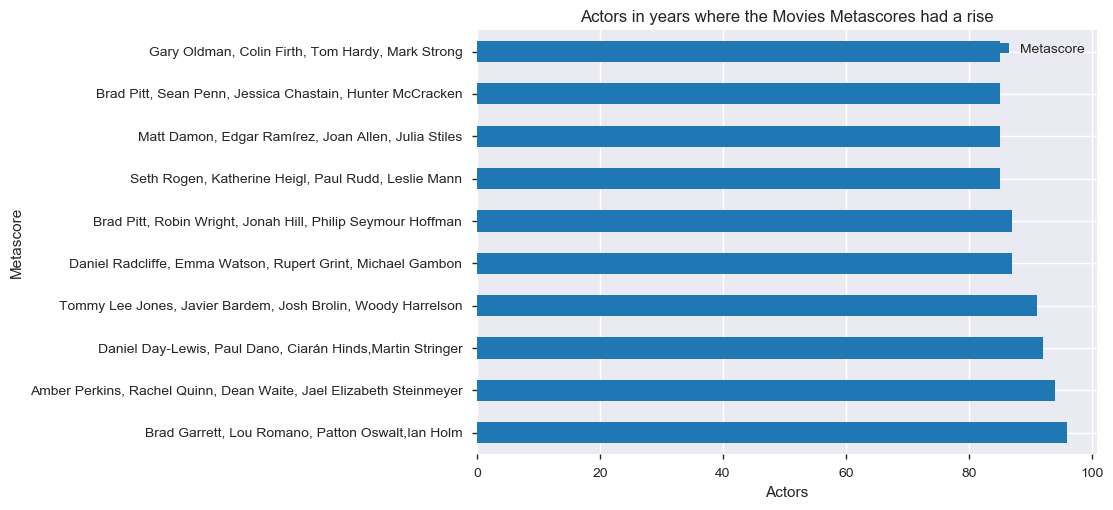

In [338]:
ax = Highest_Metascore_Actors_concat.plot.barh();
ax.set_ylabel('Metascore')
ax.set_xlabel('Actors')
ax.set_title('Actors in years where the Movies Metascores had a rise')

> #### As years 2007 and 2011 had the highest revenue, Actors with combination:
    Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm tops during the period (2006 - 2016)

<a id='section434'></a>
#### 4.3.4 Which are the top 10 Actors based on Revenue, Ratings and Metascores?

In [339]:
#Final List of Actors based on Revenue, Rating and Metascore

Final_Actors_DF = pd.concat([Highest_Revenue_Actors_concat,Highest_Rating_Actors_concat, Highest_Metascore_Actors_concat]).sort_values('Actors', ascending=False)
Final_Actors_DF = Final_Actors_DF.reset_index().set_index('Rating')
#Final_Actors_DF

C:\Users\abrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [340]:
#Split Actors combination to different columns

Split_Actors = Final_Actors_DF['Actors'].str.split(',', expand=True).rename(columns = lambda x: "Split_Actors"+str(x+1))
Split_Actors

,Split_Actors1,Split_Actors2,Split_Actors3,Split_Actors4
Rating,,,,
NaN,Zach Galifianakis,Bradley Cooper,Justin Bartha,Ed Helms
NaN,Tommy Lee Jones,Javier Bardem,Josh Brolin,Woody Harrelson
8.1,Tommy Lee Jones,Javier Bardem,Josh Brolin,Woody Harrelson
NaN,Shia LaBeouf,Megan Fox,Josh Duhamel,Tyrese Gibson
NaN,Seth Rogen,Katherine Heigl,Paul Rudd,Leslie Mann
NaN,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez
8.1,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner
NaN,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner
8.1,Richard Gere,Joan Allen,Cary-Hiroyuki Tagawa,Sarah Roemer


In [342]:
#Combining First two columns

Two_columns = Split_Actors['Split_Actors1'].append(Split_Actors['Split_Actors2'])
Two_columns_df = pd.DataFrame({'Two_columns_df2':Two_columns})
Two_columns_df

,Two_columns_df2
Rating,
NaN,Zach Galifianakis
NaN,Tommy Lee Jones
8.1,Tommy Lee Jones
NaN,Shia LaBeouf
NaN,Seth Rogen
NaN,Sam Worthington
8.1,Robert Downey Jr.
NaN,Robert Downey Jr.
8.1,Richard Gere


In [343]:
# Combining last two columns

four_columns = Split_Actors['Split_Actors3'].append(Split_Actors['Split_Actors4'])
four_columns_df = pd.DataFrame({'four_columns_df2':four_columns})
four_columns_df

,four_columns_df2
Rating,
NaN,Justin Bartha
NaN,Josh Brolin
8.1,Josh Brolin
NaN,Josh Duhamel
NaN,Paul Rudd
NaN,Sigourney Weaver
8.1,Scarlett Johansson
NaN,Scarlett Johansson
8.1,Cary-Hiroyuki Tagawa


In [344]:
# Combining all columns

All_columns = Two_columns_df['Two_columns_df2'].append(four_columns_df['four_columns_df2'])
All_columns_df = pd.DataFrame({'All_columns_df2':All_columns})
All_columns_df

,All_columns_df2
Rating,
NaN,Zach Galifianakis
NaN,Tommy Lee Jones
8.1,Tommy Lee Jones
NaN,Shia LaBeouf
NaN,Seth Rogen
NaN,Sam Worthington
8.1,Robert Downey Jr.
NaN,Robert Downey Jr.
8.1,Richard Gere


In [127]:
#Getting unique value counts of Actors

Top_Actors = All_columns_df['All_columns_df2'].value_counts()
Top_Actors = Top_Actors.head(10)
Top_Actors_df = pd.DataFrame(Top_Actors)
Top_Actors_df

,All_columns_df2
Tom Hardy,3
Joan Allen,3
Brad Pitt,3
Gary Oldman,3
Javier Bardem,3
Emma Watson,3
Woody Harrelson,2
Paul Rudd,2
Josh Brolin,2
Daniel Radcliffe,2


Text(0.5, 1.0, 'Top 10 Actors from 2006 to 2016')

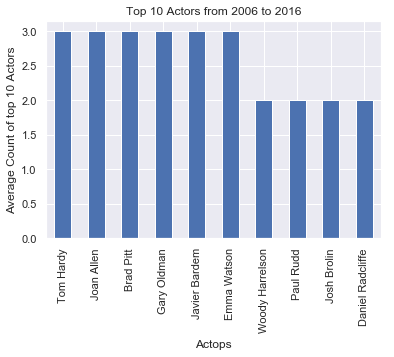

In [129]:
ax = Top_Actors_df['All_columns_df2'].plot.bar();
ax.set_ylabel('Average Count of top 10 Actors')
ax.set_xlabel('Actops')
ax.set_title('Top 10 Actors from 2006 to 2016')

> #### The top Actors based on Revenue, Ratnig and Metascore are:
Tom Hardy,
Joan Allen,
Brad Pitt,
Gary Oldman
Javier Bardem,
Emma Watson,

<a id='section44'></a>
### 4.4 Deriving best Director from the Dataset:

<a id='section441'></a>
#### 4.4.1 Which are the top most Directors in years where the Movies Revenue had a rise?

In [347]:
#Top revenue movies in 2009 by Director

Director_Revenue_2009 = Movies['Year']==2009

Movies_Director_2009_Revenue = Movies[Director_Revenue_2009]
Movies_Director_2009_Revenue

Final_Director_Revenue_2009 = Movies_Director_2009_Revenue.groupby('Director').agg({'Revenue (Millions)':'mean'}).sort_values('Revenue (Millions)', ascending=False)[:5]
Final_Director_Revenue_2009

,Revenue (Millions)
Director,
James Cameron,760.51
Michael Bay,402.08
David Yates,301.96
Pete Docter,292.98
Todd Phillips,277.31


In [348]:
#Top revenue movies in 2012 by Director

Director_Revenue_2012 = Movies['Year']==2012

Movies_Director_2012_Revenue = Movies[Director_Revenue_2012]
Movies_Director_2012_Revenue

Final_Director_Revenue_2012 = Movies_Director_2012_Revenue.groupby('Director').agg({'Revenue (Millions)':'mean'}).sort_values('Revenue (Millions)', ascending=False)[:5]
Final_Director_Revenue_2012

,Revenue (Millions)
Director,
Joss Whedon,623.28
Christopher Nolan,448.13
Gary Ross,408.00
Sam Mendes,304.36
Peter Jackson,303.00


In [349]:
# Final Director Based on Revenue

Highest_Revenue_Director_concat = pd.concat([Final_Director_Revenue_2009, Final_Director_Revenue_2012]).sort_values('Revenue (Millions)', ascending=False)
Highest_Revenue_Director_concat

,Revenue (Millions)
Director,
James Cameron,760.51
Joss Whedon,623.28
Christopher Nolan,448.13
Gary Ross,408.00
Michael Bay,402.08
Sam Mendes,304.36
Peter Jackson,303.00
David Yates,301.96
Pete Docter,292.98


Text(0.5, 1.0, 'Directors in years where the Movies Revenue had a rise')

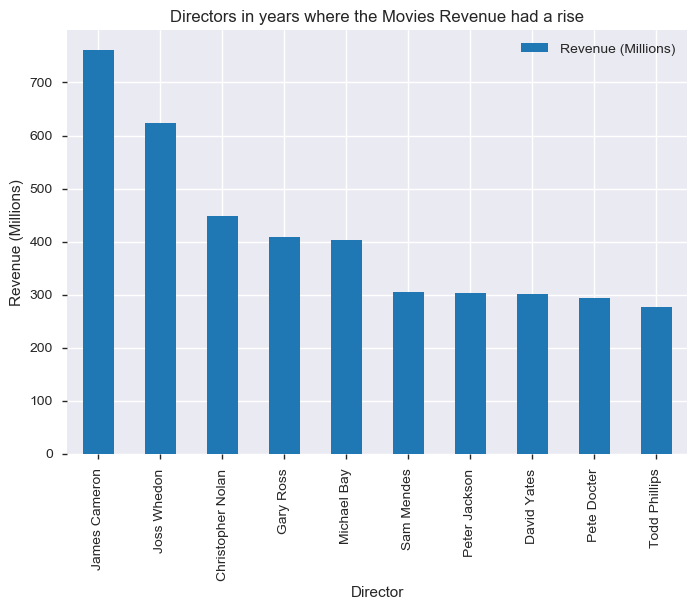

In [350]:
ax = Highest_Revenue_Director_concat.plot.bar();
ax.set_ylabel('Revenue (Millions)')
ax.set_xlabel('Director')
ax.set_title('Directors in years where the Movies Revenue had a rise')

> ##### As years 2009 and 2012 had the highest revenue, Movies directed by James Cameron tops the chart

<a id='section442'></a>
#### 4.4.2 Which are the top most Directors in years where the Movies Ratings had a rise?

In [351]:
#Top Rating movies in 2007 by Director

Director_Rating_2007 = Movies['Year']==2007

Movies_Director_2007_Rating = Movies[Director_Rating_2007]
Movies_Director_2007_Rating

Final_Director_Rating_2007 = Movies_Director_2007_Rating.groupby('Director').agg({'Rating':'mean'}).sort_values('Rating', ascending=False)[:5]
Final_Director_Rating_2007

,Rating
Director,
Aamir Khan,8.5
Paul Thomas Anderson,8.1
Paul Greengrass,8.1
Ethan Coen,8.1
Sean Penn,8.1


In [352]:
#Top Rating movies in 2009 by Director

Director_Rating_2009 = Movies['Year']==2009

Movies_Director_2009_Rating = Movies[Director_Rating_2009]
Movies_Director_2009_Rating

Final_Director_Rating_2009 = Movies_Director_2009_Rating.groupby('Director').agg({'Rating':'mean'}).sort_values('Rating', ascending=False)[:5]
Final_Director_Rating_2009

,Rating
Director,
Rajkumar Hirani,8.4
Pete Docter,8.3
Quentin Tarantino,8.3
Juan José Campanella,8.2
Lasse Hallström,8.1


In [353]:
#Top Rating movies in 2012 by Director

Director_Rating_2012 = Movies['Year']==2012

Movies_Director_2012_Rating = Movies[Director_Rating_2012]
Movies_Director_2012_Rating

Final_Director_Rating_2012 = Movies_Director_2012_Rating.groupby('Director').agg({'Rating':'mean'}).sort_values('Rating', ascending=False)[:5]
Final_Director_Rating_2012

,Rating
Director,
Christopher Nolan,8.5
Quentin Tarantino,8.4
Thomas Vinterberg,8.3
Joss Whedon,8.1
Stephen Chbosky,8.0


In [354]:
# Final Director Based on Rating

Highest_Rating_Director_concat = pd.concat([Final_Director_Rating_2007, Final_Director_Rating_2009,Final_Director_Rating_2012]).sort_values('Rating', ascending=False)
Highest_Rating_Director_concat

,Rating
Director,
Aamir Khan,8.5
Christopher Nolan,8.5
Rajkumar Hirani,8.4
Quentin Tarantino,8.4
Pete Docter,8.3
Quentin Tarantino,8.3
Thomas Vinterberg,8.3
Juan José Campanella,8.2
Paul Thomas Anderson,8.1


Text(0.5, 1.0, 'Directors in years where the Movies Ratings had a rise')

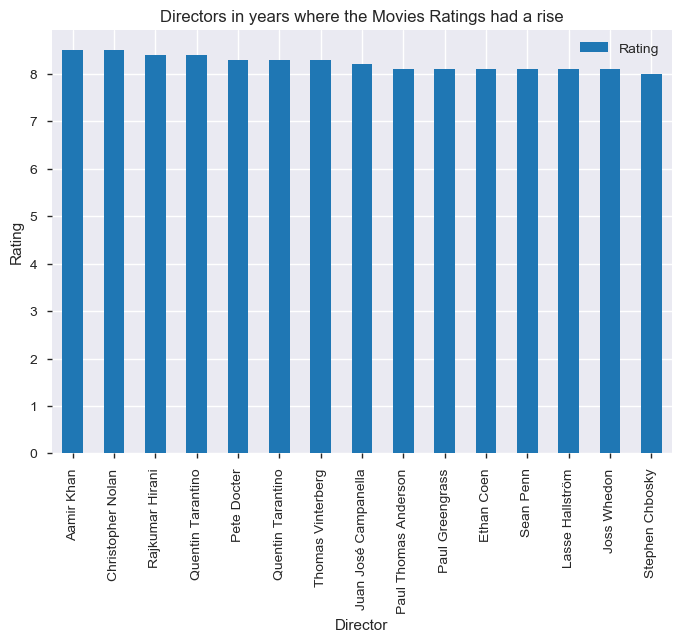

In [355]:
ax = Highest_Rating_Director_concat.plot.bar();
ax.set_ylabel('Rating')
ax.set_xlabel('Director')
ax.set_title('Directors in years where the Movies Ratings had a rise')

> ##### As years 2007, 2009 and 2012 had the highest Rating, Director Aamir Khan tops the chart based on Rating

<a id='section443'></a>
#### 4.4.3  Which are the top most Directors in years where the Movies Metascores had a rise?

In [356]:
#Top Metascore movies in 2007 by Director

Director_Metascore_2007 = Movies['Year']==2007

Movies_Director_2007_Metascore = Movies[Director_Metascore_2007]
Movies_Director_2007_Metascore

Final_Director_Metascore_2007 = Movies_Director_2007_Rating.groupby('Director').agg({'Metascore':'mean'}).sort_values('Metascore', ascending=False)[:5]
Final_Director_Metascore_2007

,Metascore
Director,
Brad Bird,96.0
Paul Thomas Anderson,92.0
Ethan Coen,91.0
Paul Greengrass,85.0
Judd Apatow,85.0


In [357]:
#Top Metascore movies in 2011 by Director

Director_Metascore_2011 = Movies['Year']==2011

Movies_Director_2011_Metascore = Movies[Director_Metascore_2011]
Movies_Director_2011_Metascore

Final_Director_Metascore_2011 = Movies_Director_2011_Metascore.groupby('Director').agg({'Metascore':'mean'}).sort_values('Metascore', ascending=False)[:5]
Final_Director_Metascore_2011

,Metascore
Director,
Michael Goi,94.0
David Yates,87.0
Bennett Miller,87.0
Tomas Alfredson,85.0
Terrence Malick,85.0


In [358]:
# Final Director Based on Metascore

Highest_Metascore_Director_concat = pd.concat([Final_Director_Metascore_2007, Final_Director_Metascore_2011]).sort_values('Metascore', ascending=False)
Highest_Metascore_Director_concat

,Metascore
Director,
Brad Bird,96.0
Michael Goi,94.0
Paul Thomas Anderson,92.0
Ethan Coen,91.0
David Yates,87.0
Bennett Miller,87.0
Paul Greengrass,85.0
Judd Apatow,85.0
Tomas Alfredson,85.0


Text(0.5, 1.0, 'Directors in years where the Movies Metascores had a rise')

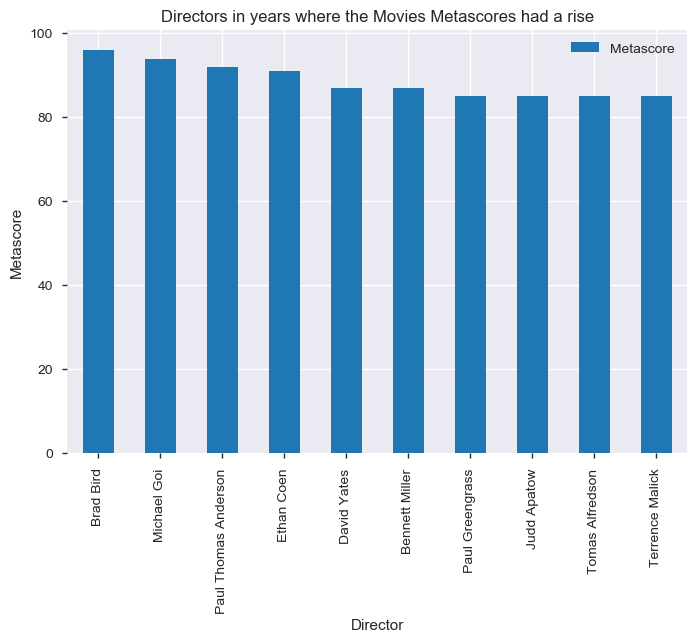

In [359]:
ax = Highest_Metascore_Director_concat.plot.bar();
ax.set_ylabel('Metascore')
ax.set_xlabel('Director')
ax.set_title('Directors in years where the Movies Metascores had a rise')

> ##### As years 2007 and 2011 had the highest Metascore, Brad Bird tops the chart as best director based on Metascore

<a id='section444'></a>
#### 4.4.4 Which are the top 10 Directors based on Revenue, Ratings and Metascores?

In [360]:
#Final List of Director based on Revenue, Rating and Metascore

Final_Director_DF = pd.concat([Highest_Revenue_Director_concat,Highest_Rating_Director_concat, Highest_Metascore_Director_concat]).sort_values('Director', ascending=False)
Final_Director_DF = Final_Director_DF.reset_index().set_index('Rating')
Final_Director_DF

C:\Users\abrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Director,Metascore,Revenue (Millions)
Rating,,,
NaN,Tomas Alfredson,85.0,NaN
NaN,Todd Phillips,NaN,277.31
8.3,Thomas Vinterberg,NaN,NaN
NaN,Terrence Malick,85.0,NaN
8.0,Stephen Chbosky,NaN,NaN
8.1,Sean Penn,NaN,NaN
NaN,Sam Mendes,NaN,304.36
8.4,Rajkumar Hirani,NaN,NaN
8.3,Quentin Tarantino,NaN,NaN


In [361]:
Top_Director = Final_Director_DF['Director'].value_counts()
Top_10_Director = Top_Director.head(10)
Top_Director_df = pd.DataFrame(Top_10_Director)
Top_Director_df

,Director
Paul Greengrass,2
Paul Thomas Anderson,2
Joss Whedon,2
Quentin Tarantino,2
David Yates,2
Pete Docter,2
Ethan Coen,2
Christopher Nolan,2
James Cameron,1
Judd Apatow,1


Text(0.5, 1.0, 'Top 10 Directors from 2006 to 2016')

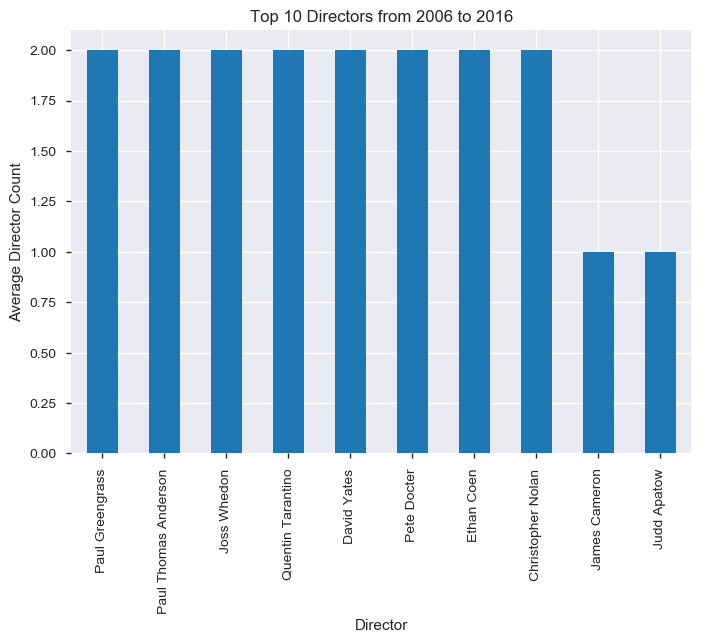

In [362]:
ax = Top_Director_df['Director'].plot.bar();
ax.set_ylabel('Average Director Count')
ax.set_xlabel('Director')
ax.set_title('Top 10 Directors from 2006 to 2016')

> ##### From above plot we can see that 
Paul Greengrass,
Paul Thomas Anderson,
Joss Whedon,
Quentin Tarantino,
David Yates,
Pete Docter,
Ethan Coen,
Christopher Nolan are the top Directors based on Revenue,Rating and Metascore

<a id='section5'></a>
### 5. Conclusion

> ### Movie production with below Genre combination, Actors and Director should yield production company a good result



|Best Genre         | Best Directors  |Best Actors	    |
|-------------------|-----------------|-----------------|
|Drama              |Paul Greengrass  |Tom Hardy        |
|Adventure          |Paul Thomas      |Joan Allen       |
|Action             |Anderson         |Brad Pitt        |
|Comedy             |Joss Whedon      |Gary Oldman      |
|Thriller           |Quentin Tarantino| Javier Bardem   |
|Mystery            |David Yates      | Emma Watson     |
|Sci-Fi             |Pete Docter      |                 |
|Family             |Ethan Coen       |                 |
|Fantasy            |Christopher Nolan|                 |
|Biography          |

## Thank You